# Language Technology - 4th Tutorial on Neural Networks with Keras


----
## Important Resources

Language Technology Resources: https://eclass.aueb.gr/modules/document/index.php?course=INF210

Python Official Documentation: https://docs.python.org/3.5/

Keras: https://keras.io/

Keras examples: https://github.com/fchollet/keras/tree/master/examples

----

## Tutorial 6 Schedule

**In order to familiarize ourselves with Neural Networks, we have the following sections:**

* **Modelling in Keras**
    * **Model Topology**
    * **Model Compilation**
    * **Model Training**
    * **Model Evaluation**

----

# Neural Network Models in Keras

Keras is the most user-friendly library in deep learning. Keras is distributed as an independent package, while it is also served throught Tensorflow. The independent package support tensorflow, theano and MXNet frameworks as a backend, which means that you can build a Keras model in a pythonic fashion, while the model is finally compiled in a low-level API.

In the upcoming Tensorflow 2.0, best practices include the use of Keras for prototyping models, in other words Keras is the standard API for now on for the biggest deep learning framework!

Available layers include:

* Embedding Layers
* Dense Layers (Fully Connected Layers)
* Merge Layers
* Recurrent Layers (LSTM, GRU)
* Convolutional Layers
* Pooling Layers
* Activation Layers (e.g., sigmoid, tanh, RELU, PRELU, etc.)
* Regularizations Layers (e.g. Dropout, BatchNormalization)
 


## Model Topology - Sequential Model (LEGO-like)

You can create a Sequential model and add/stack your layers one on top of the other like LEGO bricks.

**Python Example Code**

In [36]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Activation
 
model = Sequential()
model.add(Embedding(20000, 50, input_length=100))
model.add(Flatten())
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dense(200))  
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))


## Model Compilation

Once you have defined your model, it needs to be compiled.

This creates the efficient structures used by the underlying backend (Theano or TensorFlow) in order to efficiently execute your model during training.

You compile your model using the compile() function and it accepts three important attributes:

* Model optimizer.
* Loss function.
* Metrics.

**model.compile(optimizer=, loss=, metrics=)**

### Model Optimizers

The optimizer is the search technique used to update weights in your model.

You can create an optimizer object and pass it to the compile function via the optimizer argument. This allows you to configure the optimization procedure with it’s own arguments, such as learning rate. For example:


**sgd = SGD(...)**

**model.compile(optimizer=sgd)**


You can also use the default parameters of the optimizer by specifying the name of the optimizer to the optimizer argument. For example:

**model.compile(optimizer='sgd')**

Some popular gradient descent optimizers you might like to choose from include:

* SGD: stochastic gradient descent, with support for momentum.
* RMSprop: adaptive learning rate optimization method proposed by Geoff Hinton.
* Adam: Adaptive Moment Estimation (Adam) that also uses adaptive learning rates.


**Python Example Code:**

In [37]:
from keras.optimizers import Adam

# Compile model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Preview model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 100, 50)           1000000   
_________________________________________________________________
flatten_14 (Flatten)         (None, 5000)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 200)               1000200   
_________________________________________________________________
activation_13 (Activation)   (None, 200)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 200)               40200     
_________________________________________________________________
activation_14 (Activation)   (None, 200)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 201       
__________

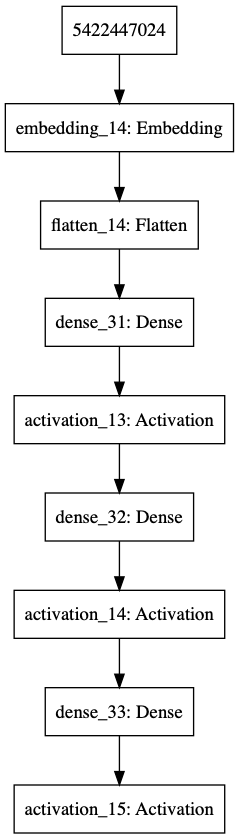

In [52]:
%matplotlib notebook

from keras.utils import plot_model
plot_model(model, to_file='model.png')

from IPython.display import Image 
Image('model.png')

## Model Training

The model is trained on NumPy arrays using the fit() function, for example

**model.fit(X, y, epochs=, batch_size=)**

Training both specifies the number of epochs to train on and the batch size.

* Epochs (nb_epoch) is the number of times that the model is exposed to the training dataset.
* Batch Size (batch_size) is the number of training instances shown to the model before a weight update is performed.

The fit function also allows for some basic evaluation of the model during training. You can set the validation_split value to hold back a fraction of the training dataset for validation to be evaluated each epoch, or provide a validation_data tuple of (X, y) of data to evaluate.

Fitting the model returns a history object with details and metrics calculated for the model each epoch. This can be used for graphing model performance.

**Python Example Code:**

In [14]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten, Dropout
from keras.datasets import imdb
from sklearn import metrics



# Load IMDB Dataset for binary sentiment analysis
vocab_size = 20000
maxlen = 100
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

# Pad/Truncate sequences in a maximum length
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

# Train model for 15 epochs with 32 mini match size
print('Train...')
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=15,
                    validation_data=(x_test, y_test))

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 100)
y_train shape: (25000,)
x_test shape: (25000, 100)
y_test shape: (25000,)
Train...
Instructions for updating:
Use tf.cast instead.
Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 13s 535us/step - loss: 0.4159 - acc: 0.7980 - val_loss: 0.3854 - val_acc: 0.8307
Epoch 2/15
25000/25000 [==============================] - 13s 507us/step - loss: 0.0919 - acc: 0.9686 - val_loss: 0.5803 - val_acc: 0.8136
Epoch 3/15
25000/25000 [==============================] - 12s 495us/step - loss: 0.0139 - acc: 0.9954 - val_loss: 0.9704 - val_acc: 0.8177
Epoch 4/15
25000/25000 [==============================] - 13s 508us/step - loss: 0.0130 - acc: 0.9951 - val_loss: 0.9337 - val_acc: 0.8210
Epoch 5/15
25000/25000 [==============================] - 13s 505us/step - loss: 0.0088 - acc: 0.9968 - val_loss: 1.0855 - val_acc: 0.8140
Epoch 

## Plot training history

<IPython.core.display.Javascript object>


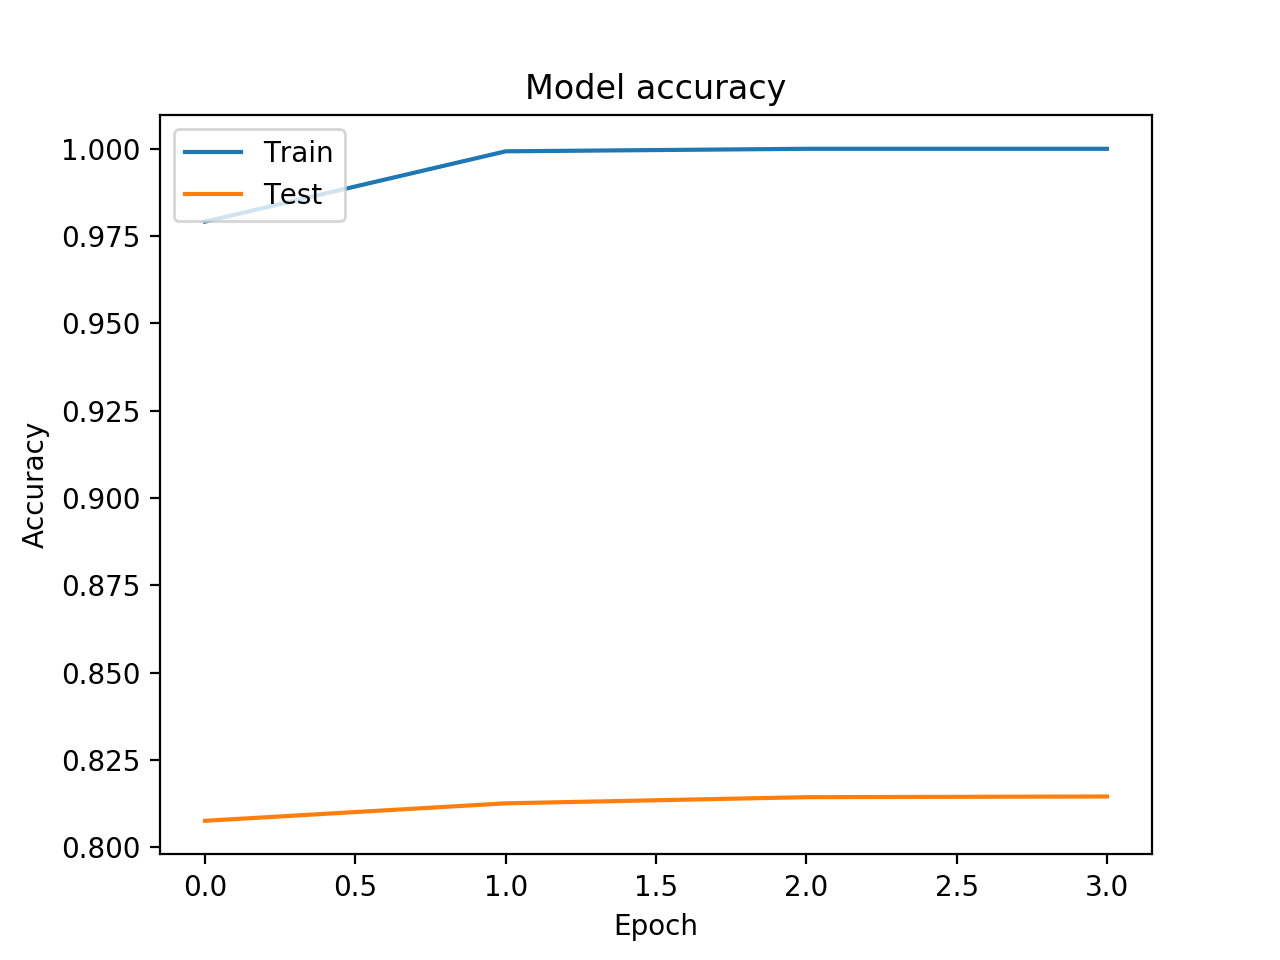

In [44]:
%matplotlib notebook
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

<IPython.core.display.Javascript object>


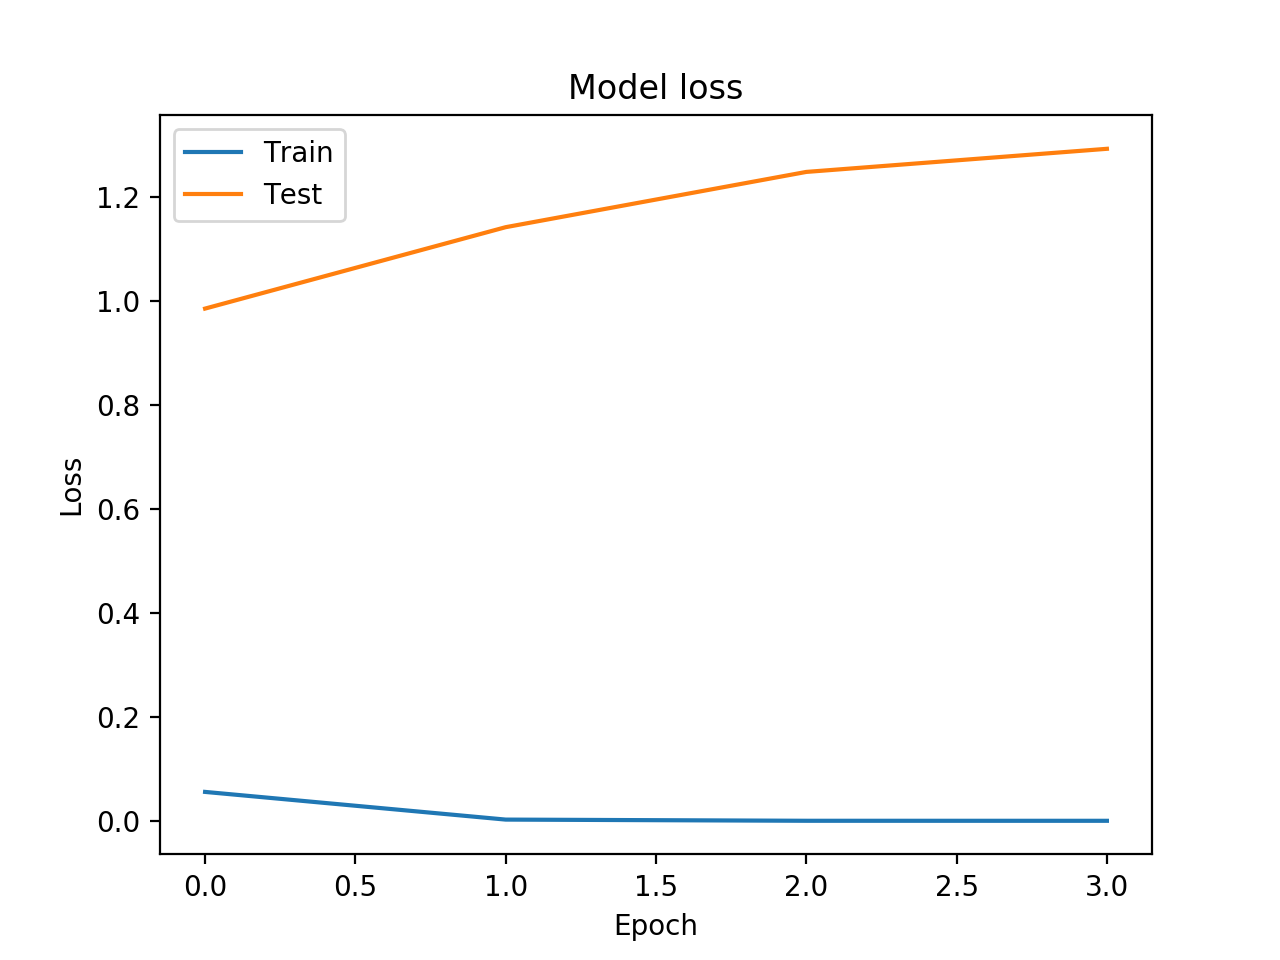

In [45]:
%matplotlib notebook
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Model Prediction

Once you have trained your model, you can use it to make predictions on test data or new data.

There are a number of different output types you can calculate from your trained model, each calculated using a different function call on your model object. For example:

* model.evaluate(): To calculate the loss values for input data.
* model.predict(): To generate network output for input data.
* model.predict_classes(): To generate class outputs for input data.
* model.predict_proba(): To generate class probabilities for input data.

## Model evaluation

The biggest draw-back of Keras framework is the support level of evaluation functions. Keras support only loss and acurracy metrics through its own framework, while developers can create their own metricc implementation. Although, we can use Keras model's prediction functionality with Scikit-learn metrics reports and this will work like a charm!


In [20]:
# Recall information from history object
print(history.history.keys())

for key, value in history.history.items():
    print('{}: {}'.format(key, value[-1]))

# Evaluation model using SK-learn functions
y_pred = model.predict_classes(x_test, batch_size=1, verbose=0)
print(metrics.classification_report(y_test, y_pred.flatten()))

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
val_loss: 1.6688857409524918
val_acc: 0.79696
loss: 0.0022296917459484304
acc: 0.99932
              precision    recall  f1-score   support

           0       0.76      0.87      0.81     12500
           1       0.85      0.73      0.78     12500

   micro avg       0.80      0.80      0.80     25000
   macro avg       0.80      0.80      0.80     25000
weighted avg       0.80      0.80      0.80     25000



# Use callback functions

In [23]:
import keras.backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Reset Model weights
def reset_weights(model):
    session = K.get_session()
    for layer in model.layers: 
        if hasattr(layer, 'kernel_initializer'):
            layer.kernel.initializer.run(session=session)

# Initialize callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(filepath='CHECKPOINT_1.hdf5', monitor='val_loss', mode='auto',
                                   verbose=1, save_best_only=True, save_weights_only=True)

# Re-Train model with callbacks
print('Train...')
reset_weights(model)
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=15,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping, model_checkpoint])

# Re-evaluate
y_pred = model.predict_classes(x_test, batch_size=1, verbose=0)
print(metrics.classification_report(y_test, y_pred.flatten()))

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 12s 484us/step - loss: 0.0556 - acc: 0.9792 - val_loss: 0.9848 - val_acc: 0.8076

Epoch 00001: val_loss improved from inf to 0.98482, saving model to CHECKPOINT_1.hdf5
Epoch 2/15
25000/25000 [==============================] - 12s 470us/step - loss: 0.0023 - acc: 0.9993 - val_loss: 1.1413 - val_acc: 0.8126

Epoch 00002: val_loss did not improve from 0.98482
Epoch 3/15
25000/25000 [==============================] - 12s 469us/step - loss: 5.0999e-05 - acc: 1.0000 - val_loss: 1.2476 - val_acc: 0.8144

Epoch 00003: val_loss did not improve from 0.98482
Epoch 4/15
25000/25000 [==============================] - 13s 505us/step - loss: 8.8483e-06 - acc: 1.0000 - val_loss: 1.2920 - val_acc: 0.8146

Epoch 00004: val_loss did not improve from 0.98482
              precision    recall  f1-score   support

           0       0.83      0.77      0.80     12500
           1       0.79  

## Model Topology - Functional API

You can also create a model using the functional programming. Each layer is used as a function F(x), where x is a previous layer's outputs.

The main advances of functional API:

* Reuse of layer outputs in multiple layers (i.e., residual connections)
* Multipul inputs and/or outputs in the model (i.e., multi-inputs, multi-task learning)

**Python Example Code**

In [57]:
from keras.models import Model
from keras.layers import Input, Embedding, Flatten, Dense, Dropout, add

inputs =  Input(shape=(100, ), dtype='int32')
embeddings = Embedding(20000, 50, input_length=100)(inputs)
embeddings = Dropout(rate=0.2)(embeddings)
flatten_input = Flatten()(embeddings)
hidden_1 = Dense(200, activation='relu')(flatten_input)
hidden_1 = Dropout(rate=0.2)(hidden_1)
hidden_2 = Dense(200, activation='relu')(hidden_1)
hidden_2 = Dropout(rate=0.2)(hidden_2)
add_1_2 = add([hidden_1, hidden_2])
outputs = Dense(1, activation='sigmoid')(add_1_2)

# Wrap model
model = Model(inputs=inputs, outputs=outputs)

# Compile model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Print topology
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 100)          0                                            
__________________________________________________________________________________________________
embedding_17 (Embedding)        (None, 100, 50)      1000000     input_10[0][0]                   
__________________________________________________________________________________________________
dropout_17 (Dropout)            (None, 100, 50)      0           embedding_17[0][0]               
__________________________________________________________________________________________________
flatten_17 (Flatten)            (None, 5000)         0           dropout_17[0][0]                 
__________________________________________________________________________________________________
dense_40 (

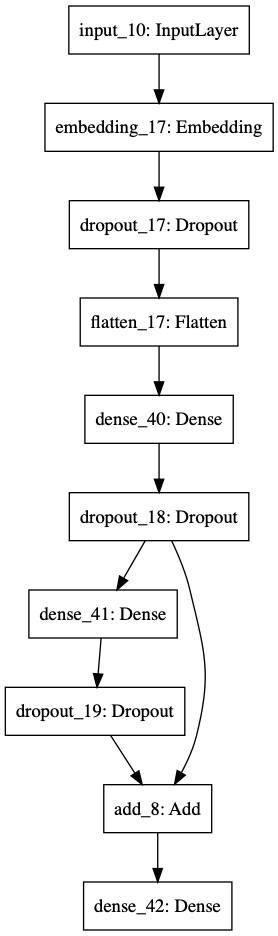

In [58]:
%matplotlib notebook

from keras.utils import plot_model
plot_model(model, to_file='model.png')

from IPython.display import Image 
Image('model.png')

In [59]:
# Initialize callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(filepath='CHECKPOINT_1.hdf5', monitor='val_loss', mode='auto',
                                   verbose=1, save_best_only=True, save_weights_only=True)

# Re-Train model with callbacks
print('Train...')
reset_weights(model)
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=15,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping, model_checkpoint])

# Re-evaluate
y_prob = model.predict(x_test, batch_size=1, verbose=0)
print(metrics.classification_report(y_test, (y_prob > 0.5).astype('int32')))

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 14s 542us/step - loss: 0.4318 - acc: 0.7856 - val_loss: 0.3400 - val_acc: 0.8510

Epoch 00001: val_loss improved from inf to 0.34000, saving model to CHECKPOINT_1.hdf5
Epoch 2/15
25000/25000 [==============================] - 13s 504us/step - loss: 0.1184 - acc: 0.9586 - val_loss: 0.4829 - val_acc: 0.8242

Epoch 00002: val_loss did not improve from 0.34000
Epoch 3/15
25000/25000 [==============================] - 13s 516us/step - loss: 0.0293 - acc: 0.9902 - val_loss: 0.6478 - val_acc: 0.8265

Epoch 00003: val_loss did not improve from 0.34000
Epoch 4/15
25000/25000 [==============================] - 13s 510us/step - loss: 0.0195 - acc: 0.9930 - val_loss: 0.8034 - val_acc: 0.8208

Epoch 00004: val_loss did not improve from 0.34000
              precision    recall  f1-score   support

           0       0.86      0.84      0.85     12500
           1       0.85      0.86

In [4]:
from keras.models import Model
from keras.layers import Input, Embedding, Flatten, Dense, Dropout, add, TimeDistributed, GlobalMaxPooling1D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten, Dropout
from keras.datasets import imdb
from sklearn import metrics

# SetUp Model 
inputs =  Input(shape=(100, ), dtype='int32')
embeddings = Embedding(20000, 50, input_length=100)(inputs)
embeddings = Dropout(rate=0.4)(embeddings)
hidden_1 = TimeDistributed(Dense(200, activation='relu'))(embeddings)
hidden_1 = Dropout(rate=0.2)(hidden_1)
hidden_2 = TimeDistributed(Dense(200, activation='relu'))(hidden_1)
hidden_2 = Dropout(rate=0.2)(hidden_2)
add_1_2 = add([hidden_1, hidden_2])
document_encoding = GlobalMaxPooling1D()(add_1_2)
document_encoding = Dropout(rate=0.2)(document_encoding)
outputs = Dense(1, activation='sigmoid')(document_encoding)

# Wrap model
model = Model(inputs=inputs, outputs=outputs)

# Compile model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Print topology
model.summary()

# Initialize callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(filepath='CHECKPOINT_1.hdf5', monitor='val_loss', mode='auto',
                                   verbose=1, save_best_only=True, save_weights_only=True)

# Re-Train model with callbacks
print('Train...')
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=15,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping, model_checkpoint])

# Re-evaluate
y_prob = model.predict(x_test, batch_size=1, verbose=0)
print(metrics.classification_report(y_test, (y_prob > 0.5).astype('int32')))

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 100, 50)      1000000     input_4[0][0]                    
__________________________________________________________________________________________________
dropout_10 (Dropout)            (None, 100, 50)      0           embedding_4[0][0]                
__________________________________________________________________________________________________
time_distributed_7 (TimeDistrib (None, 100, 200)     10200       dropout_10[0][0]                 
__________________________________________________________________________________________________
dropout_11